ARIMA to predict weather of daily

In [ ]:
import requests
import datetime

# Glasgow coordinates
latitude = 55.8642
longitude = -4.2518

# Date calculation (last 20 years until today)
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=80*365)  # 20 years ago

# Format dates as YYYY-MM-DD
start = start_date.strftime('%Y-%m-%d')
end = end_date.strftime('%Y-%m-%d')

# Build Open-Meteo API URL
url = (
    "https://archive-api.open-meteo.com/v1/archive"
    f"?latitude={latitude}"
    f"&longitude={longitude}"
    f"&start_date={start}"
    f"&end_date={end}"
    "&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum"
    "&timezone=Europe/London"
    "&format=csv" 
)

# Fetch and write CSV
response = requests.get(url)
if response.status_code == 200:
    with open("glasgow_weather_last20years.csv", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("Download complete: glasgow_weather_last20years.csv")
else:
    print("Download failed:", response.status_code)



Download complete: glasgow_weather_last20years.csv


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [16]:
data = pd.read_csv('glasgow_weather_last20years.csv')

In [17]:
data.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm)
0,1945-10-21,15.1,12.5,14.3,1.3
1,1945-10-22,14.2,9.8,11.7,7.5
2,1945-10-23,12.0,10.1,11.0,10.5
3,1945-10-24,13.3,8.4,10.1,7.5
4,1945-10-25,11.5,8.2,10.2,6.1


In [18]:
df = data.copy()

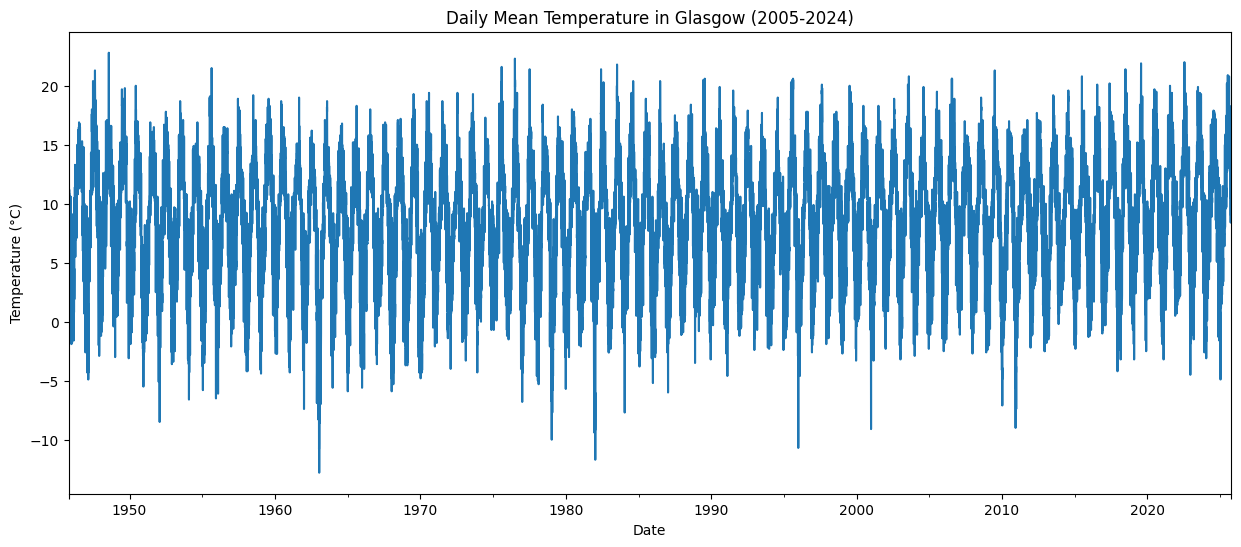

In [19]:
#plot the daily temperature

data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data['temperature_2m_mean (°C)'].plot(figsize=(15,6))
plt.title('Daily Mean Temperature in Glasgow (2005-2024)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()


In [ ]:
#plot ACF and PACF



In [20]:
#min and max temperature of all time
print("Max Temperature:", data['temperature_2m_mean (°C)'].max())
print("Min Temperature:", data['temperature_2m_mean (°C)'].min())

Max Temperature: 22.8
Min Temperature: -12.8


In [21]:
#forecast for next 5 days
model = ARIMA(data['temperature_2m_mean (°C)'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)
print("5-Day Temperature Forecast:", forecast)


c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


5-Day Temperature Forecast: 2025-10-02    14.242799
2025-10-03    13.613437
2025-10-04    13.250729
2025-10-05    12.942774
2025-10-06    13.059845
Freq: D, Name: predicted_mean, dtype: float64


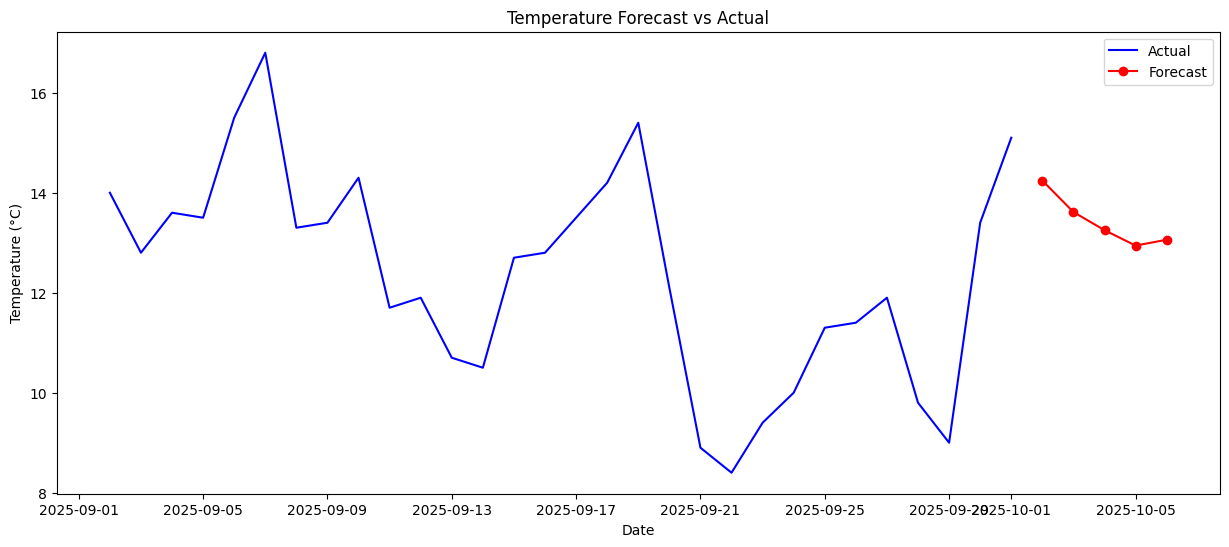

In [23]:
#plot the predicted values along with the actual values for last 10 days
plt.figure(figsize=(15,6))
plt.plot(data.index[-30:], data['temperature_2m_mean (°C)'][-30:], label='Actual', color='blue')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5), forecast, label='Forecast', color='red', marker='o')
plt.title('Temperature Forecast vs Actual')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.legend()
plt.show()